## Scrape job posting from local school district job posting site

This data is found here: https://columbia.tedk12.com/hire/Index.aspx

Practical uses for this code is to see the given need of the district any point in time. Also, it may be interesting to run as a CRON job to see changes over time.

#### Find jobs table and paginate through to download all data

In [3]:
import requests
from bs4 import BeautifulSoup

base_url='https://columbia.tedk12.com/hire/Index.aspx'
table=[]

for x in range(0,6):
    index = x * 50
    url = f'https://columbia.tedk12.com/hire/Index.aspx?JobListAJAX=Paging&StartIndex={index}&ListID=JobList&SearchString='
    webpage = requests.get(url)
    soup = BeautifulSoup(webpage.content, 'xml')

    child = soup.find('TheList').get_text()

    soup2 = BeautifulSoup(child, 'html.parser')

    rows = range(1,51)
    for row in rows:
        joblist = []
        for cell in soup2.select(f'#JobList_{row} > td'): 
            joblist.append(cell.get_text())
        if joblist:
            joblist.pop(-1)
            table.append(joblist)
print(table)

[['Head Custodian - CELN', '05/23/2022', 'Custodial', 'Facilities And Construction Services'], ['Day Porter- Gentry Middle School', '05/23/2022', 'Custodial', 'Facilities And Construction Services'], ['Custodian- Night Part Time (Grant Elementary School)', '05/23/2022', 'Custodial', 'Facilities And Construction Services'], ['Custodian- Night (Grant Elementary School)', '05/23/2022', 'Custodial', 'Custodial and Warehouse Services'], ['Custodian- Night (Alpha Hart Lewis Elementary School)', '05/23/2022', 'Custodial', 'Custodial and Warehouse Services'], ['Head Custodian -Parkade Elementary School', '05/23/2022', 'Custodial', 'Facilities And Construction Services'], ['Custodial Services - Lead Night Custodian- Paxton Keeley Elementary School', '05/23/2022', 'Custodial', 'Custodial and Warehouse Services'], ['Office Staff - Secretary- Fine Arts (Rock Bridge High School)', '05/23/2022', 'Office Support (Clerical)', 'Rock Bridge High School'], ['Office Staff - Attendance Secretary, Alpha Har

#### Load into a pandas dataframe

In [116]:
import pandas as pd

df=pd.DataFrame(table, columns=['Job Title', 'Posting Date', 'Type', 'Location'])
display(df.head())

,Job Title,Posting Date,Type,Location
0,Head Custodian - CELN,05/23/2022,Custodial,Facilities And Construction Services
1,Day Porter- Gentry Middle School,05/23/2022,Custodial,Facilities And Construction Services
2,Custodian- Night Part Time (Grant Elementary S...,05/23/2022,Custodial,Facilities And Construction Services
3,Custodian- Night (Grant Elementary School),05/23/2022,Custodial,Custodial and Warehouse Services
4,Custodian- Night (Alpha Hart Lewis Elementary ...,05/23/2022,Custodial,Custodial and Warehouse Services


#### Group by location

In [59]:
locationdf = df.groupby('Location').Type.count().reset_index()
locationdf.rename(columns={'Type':'Number of Job Postings'}, inplace=True)
locationdf.sort_values(by=['Number of Job Postings'], ascending=False, inplace=True)
display(locationdf.reset_index())

,index,Location,Number of Job Postings
0,40,Summer School,54
1,11,Columbia Public Schools,32
2,38,Special Services,25
3,16,Facilities And Construction Services,20
4,12,Custodial and Warehouse Services,13
5,4,Battle High School,11
6,42,West Middle School,9
7,29,Nutrition Services,8
8,24,John Warner Middle School,7
9,15,English Language Learners,6


#### Graph location dataframe using pyplot and seaborn

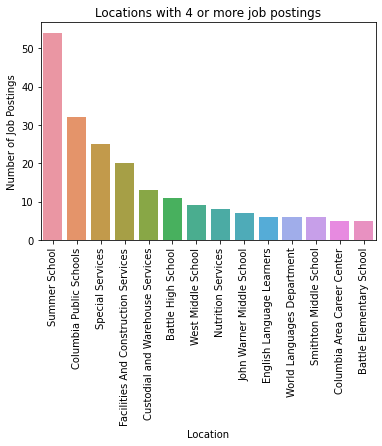

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns

#plt.bar(locationdf['Location'], locationdf['Number of Job Postings'])
sns.barplot(data=locationdf.head(14), x='Location', y='Number of Job Postings')
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Locations with 4 or more job postings')
plt.show()


#### Graph by post time 

C:\Users\Cole Schnell\AppData\Local\Temp\ipykernel_19292\1721688260.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.subplot().set_xticklabels(['', 'April 2021', 'July 2021', 'Oct. 2021', 'Jan. 2022', 'April 2022'])


[Text(0.0, 0, '')]

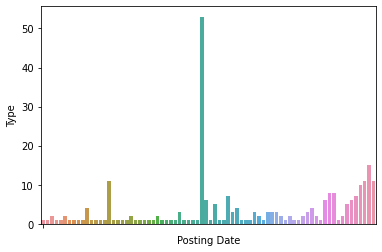

In [106]:
import numpy as np
import matplotlib.dates as mdate
import datetime as dt
timedf = df.groupby('Posting Date').Type.count().reset_index()
timedf['Posting Date'] = pd.to_datetime(timedf['Posting Date'])
timedf.sort_values(by='Posting Date', inplace=True)
sns.barplot(data=timedf, x='Posting Date', y='Type')
locator = mdate.MonthLocator(interval=3)
plt.gca().xaxis.set_major_locator(locator)
plt.subplot().set_xticklabels(['', 'April 2021', 'July 2021', 'Oct. 2021', 'Jan. 2022', 'April 2022'])

#### Group by type

,index,Type,Number of Job Postings
0,0,Administrative (Certified),1
1,16,Substitute,1
2,11,Occupational Therapy/Physical Therapy,1
3,7,Home Grown,1
4,5,Data Services,1
5,8,Maintenance,2
6,9,Nurse,2
7,1,Adult Education,2
8,13,Seasonal Temp - FCS,3
9,18,Technology Services,3


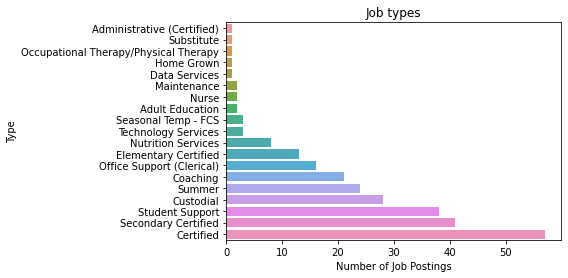

In [126]:
typedf = df.groupby('Type').Location.count().reset_index()
typedf.rename(columns={'Location':'Number of Job Postings'}, inplace=True)
typedf.sort_values(by=['Number of Job Postings'], ascending=True, inplace=True)
display(typedf.reset_index())
sns.barplot(data=typedf, y='Type', x='Number of Job Postings', orient='h')
plt.xticks(fontsize = 10)
plt.title('Job types')
plt.show()